In [275]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import string
import os
from mlxtend.plotting import plot_confusion_matrix

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk import PorterStemmer
from nltk import tokenize
from wordcloud import wordcloud




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [221]:
data = pd.read_csv("/content/spam.csv", encoding ='latin-1',usecols=['v1','v2'])

In [222]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [223]:
data.columns=['label','text']

In [224]:
data.sample()

,label,text
3007,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."


EDA

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [226]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [227]:
data.duplicated().sum()

403

In [228]:
data.drop_duplicates(inplace=True)

In [229]:
data.duplicated().sum()

0

In [230]:
data.describe()

,label,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [231]:
data['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [232]:
data['text'].value_counts()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                                                                             ..
;-( oh well, c u later                  

Data Preprocessing

In [233]:

def target_mapper(text):
  return 0 if text=='spam' else 1
data["label"] = data['label'].apply(func=target_mapper)

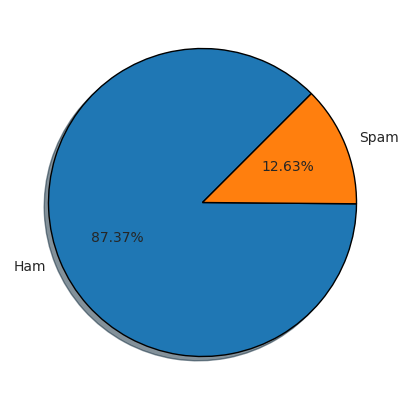

In [234]:

label = np.array(["Ham","Spam"])

plt.figure(figsize=(5,5))
plt.pie(values, labels = label, autopct='%1.2f%%',startangle=45,counterclock =True,shadow=True,
        wedgeprops={"edgecolor":"k",'linewidth': 1,'linestyle': '-'})
plt.show()


In [235]:
Stopwords = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]',' ',text)
    text = re.sub(r'\s+',' ',text)
    text = " ".join (word for word in text.split() if word not in Stopwords)
    return text

In [236]:
data['clean_text']= data['text'].apply(clean_text)
data.head()

,label,text,clean_text
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,1,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [237]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=8,background_color='white')

Wordcloud for spam Category

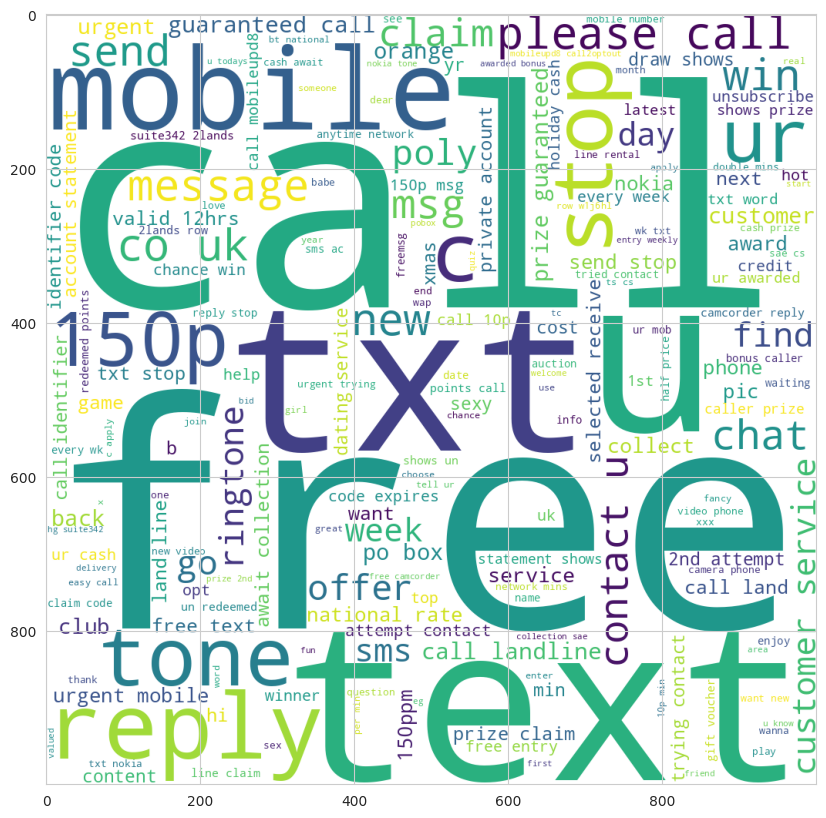

In [238]:
spam_wc=wc.generate(data[data["label"]==0]["clean_text"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)
plt.show()

Wordcloud for ham Category

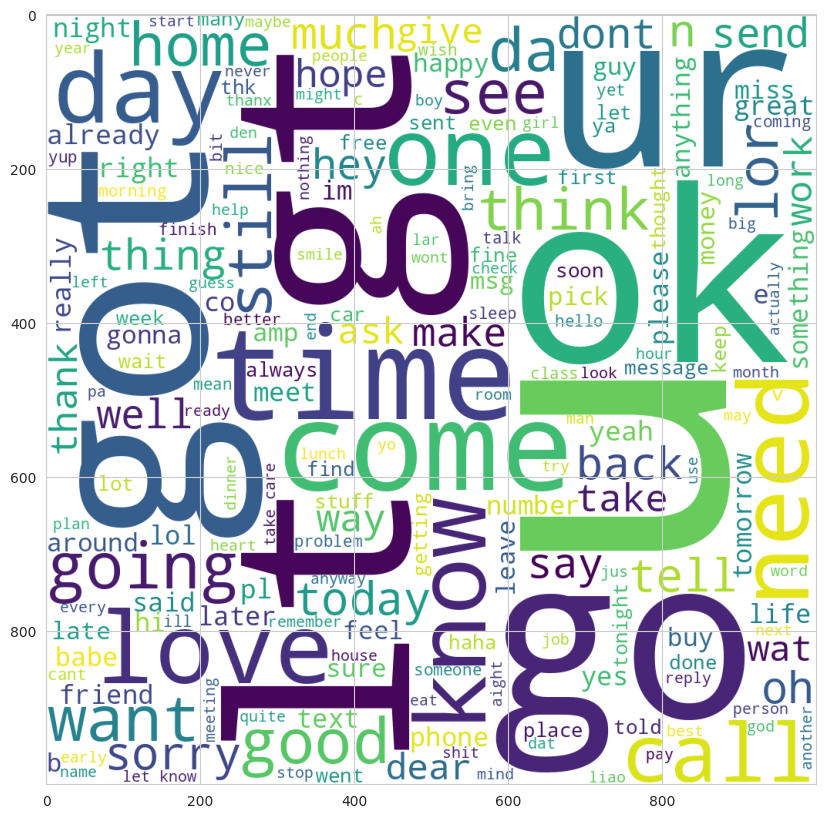

In [239]:
ham_wc=wc.generate(data[data["label"]==1]["clean_text"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)
plt.show()

Used words in spam category

In [241]:
spam_corpus=list()
for msg in data[data['label']==0]["clean_text"].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [242]:
len(spam_corpus)

11744

In [243]:
from collections import Counter
spam_top_50_common_words=pd.DataFrame(Counter(spam_corpus).most_common(50))
print(spam_top_50_common_words)

             0    1
0         call  309
1         free  195
2            2  184
3            u  147
4          txt  134
5           ur  119
6            4  114
7       mobile  109
8         stop  109
9         text  108
10       claim   96
11       reply   96
12           1   94
13         www   83
14       prize   82
15         get   71
16        cash   65
17        150p   64
18         new   64
19          uk   60
20        send   59
21      urgent   58
22       nokia   56
23           c   51
24     contact   51
25         win   50
26      please   50
27         msg   50
28     service   49
29         com   47
30        week   46
31          50   46
32        tone   45
33          co   43
34          18   43
35       phone   43
36  guaranteed   42
37         per   41
38    customer   40
39          16   39
40         min   38
41           3   37
42        chat   37
43          cs   37
44         500   36
45        1000   34
46        draw   34
47         100   33
48        mins   33


Used words in ham category

In [244]:
ham_corpus=list()
for msg in data[data['label']==1]["clean_text"].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [245]:
len(ham_corpus)

36228

In [246]:
ham_top_50_common_words=pd.DataFrame(Counter(ham_corpus).most_common(50))
print(ham_top_50_common_words)

        0    1
0       u  915
1       2  302
2     get  297
3      gt  288
4      lt  287
5      ok  255
6      go  241
7     got  226
8    know  225
9    like  222
10   good  215
11   come  211
12     ur  198
13   time  192
14   call  190
15    day  184
16   love  180
17      4  171
18  going  164
19   want  160
20    lor  159
21    one  158
22   home  156
23   need  154
24  still  145
25     da  142
26      k  138
27    see  135
28  today  127
29   back  127
30  think  126
31      n  124
32   dont  123
33  sorry  122
34      r  121
35   take  120
36   tell  117
37     hi  117
38   well  111
39   send  111
40   much  111
41     oh  110
42    hey  107
43   hope  106
44  night  103
45    wat  102
46  later  100
47  great   97
48    way   95
49  happy   95


Data Transformation

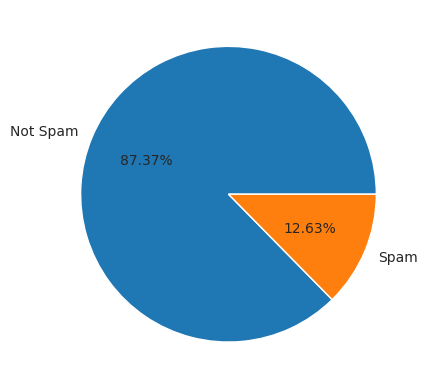

In [251]:
from sklearn.feature_extraction.text import CountVectorizer
cVector=CountVectorizer()
x=cVector.fit_transform(data["clean_text"]).toarray()
y=data['label']

plt.pie(y.value_counts().values,labels=["Not Spam","Spam"],autopct="%0.2f%%")
plt.show()


In [252]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4135, 8486), (4135,), (1034, 8486), (1034,))

In [253]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

def evaluate_model_performance(model,x_test,y_test):
    y_pred=model.predict(x_test)
    print("Accurary Score : {}".format(np.round(accuracy_score(y_test,y_pred)*100,decimals=2)))
    print("Precision Score : {}".format(np.round(precision_score(y_test,y_pred)*100,decimals=2)))
    print("Recall Score : {}".format(np.round(recall_score(y_test,y_pred)*100,decimals=2)))
    print("F1 Score : {}".format(np.round(f1_score(y_test,y_pred)*100,decimals=2)))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,fmt="d",annot=True,cmap="rainbow")
    plt.show()
    print("*Classification Report")
    print(classification_report(y_test,y_pred))

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

In [255]:
models = {
    "lr":LogisticRegression(),
    "nb":MultinomialNB(),
    "svm":SVC(),
    "knn":KNeighborsClassifier(),
    "cart":DecisionTreeClassifier(),
    "rf":RandomForestClassifier(),
    "ad":AdaBoostClassifier(),
    "gb":GradientBoostingClassifier(),
    "xgbc":XGBClassifier()
}

In [256]:
oversampler = RandomOverSampler()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_scores=list()

for model_name, model in models.items():

    X_resampled, y_resampled = oversampler.fit_resample(x, y)

    scores = cross_val_score(model, X_resampled[:500], y_resampled[:500], cv=cv, scoring="f1_micro")
    print(model_name," : ",np.round(np.mean(scores)*100,decimals=2))
    model_scores.append(scores)

lr  :  93.6
nb  :  98.2
svm  :  89.6
knn  :  85.8
cart  :  92.2
rf  :  90.8
ad  :  93.4
gb  :  92.4
xgbc  :  92.4


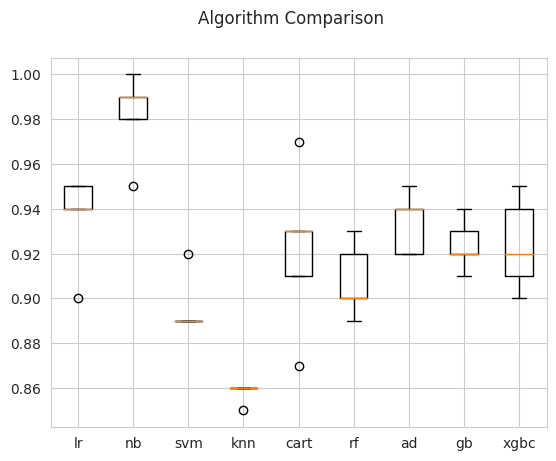

In [257]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_scores)
ax.set_xticklabels(models.keys())
plt.show()

In [258]:
model=MultinomialNB()
model.fit(x_train,y_train)
print("Model Training score : ",model.score(x_train,y_train))

Model Training score :  0.9937122128174123


Accurary Score : 97.87
Precision Score : 99.1
Recall Score : 98.44
F1 Score : 98.77


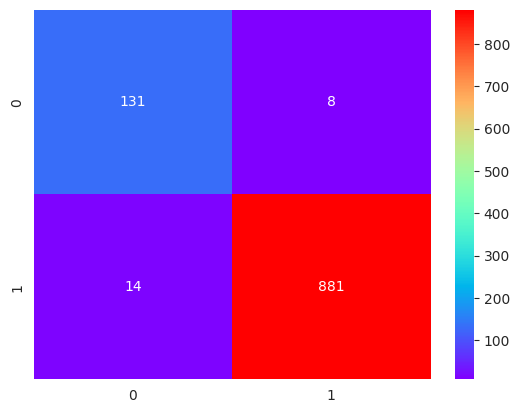

*Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       139
           1       0.99      0.98      0.99       895

    accuracy                           0.98      1034
   macro avg       0.95      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [259]:
evaluate_model_performance(model,x_test,y_test)

Feature Scaling

In [260]:
X = data['text']
y = data['label']
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 43, stratify = y)


In [262]:

from sklearn.metrics import *
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [263]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
cv = CountVectorizer(ngram_range = (1,3))

Xtrain_idf = tfidf.fit_transform(Xtrain)
Xtest_idf = tfidf.transform(Xtest)

Xtrain_cv = cv.fit_transform(Xtrain)
Xtest_cv = cv.transform(Xtest)

In [266]:
mnb = MultinomialNB()

params = {'alpha':[0.1,0.5,0.8,1,2,5,7,10]}

rcv = RandomizedSearchCV(mnb,
                        params,
                        scoring = 'accuracy',
                        cv = 10,
                         n_jobs = -1,
                         random_state = 3,
                         verbose = 3
                        )
rcv.fit(Xtrain_idf,ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 8 candidates, totalling 80 fits


RandomizedSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.5, 0.8, 1, 2, 5, 7,
                                                  10]},
                   random_state=3, scoring='accuracy', verbose=3)

In [267]:
print('Best Score is ',rcv.best_score_,' for ',rcv.best_params_)

Best Score is  0.9637301002444703  for  {'alpha': 0.5}


In [270]:
mnb_idf = MultinomialNB(alpha = 0.5)

mnb_idf.fit(Xtrain_idf,ytrain)

y_pred_idf = mnb_idf.predict(Xtest_idf)

print(classification_report(ytest,y_pred_idf))



              precision    recall  f1-score   support

           0       1.00      0.60      0.75       131
           1       0.95      1.00      0.97       903

    accuracy                           0.95      1034
   macro avg       0.97      0.80      0.86      1034
weighted avg       0.95      0.95      0.94      1034



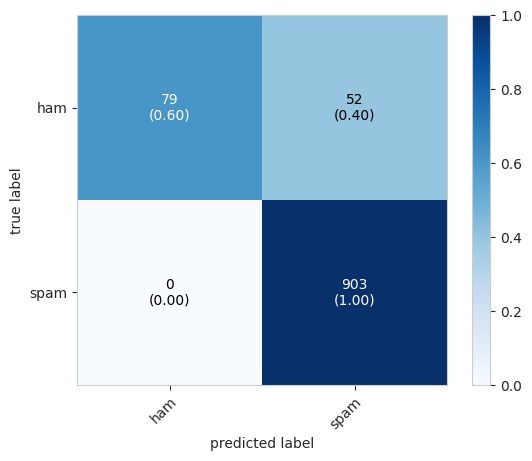

In [277]:
cm = confusion_matrix(ytest, y_pred_idf)
fig, ax = plot_confusion_matrix(conf_mat=cm , show_absolute=True, show_normed=True, colorbar=True, class_names=["ham", "spam"])

plt.show()

In [272]:
print('Train Accuracy - ', accuracy_score(ytrain,mnb_idf.predict(Xtrain_idf)))
print("Test Accuracy - ", accuracy_score(ytest,y_pred_idf))

Train Accuracy -  0.9937122128174123
Test Accuracy -  0.9497098646034816


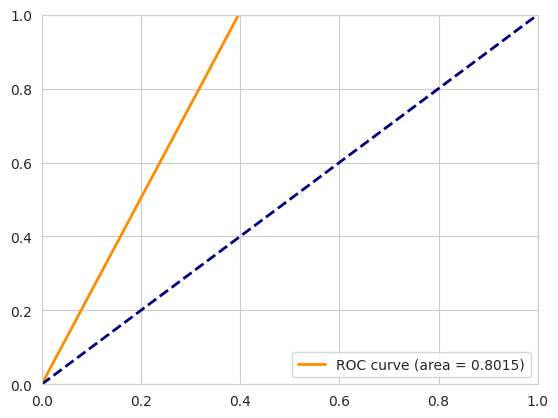

In [273]:
fpr, tpr, _ = roc_curve(ytest, y_pred_idf)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")

MultinomialNB + CountVectorizer



In [278]:
rcv.fit(Xtrain_cv,ytrain)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.5, 0.8, 1, 2, 5, 7,
                                                  10]},
                   random_state=3, scoring='accuracy', verbose=3)

In [279]:
print('Best Score is ',rcv.best_score_,' for ',rcv.best_params_)

Best Score is  0.9799329754009195  for  {'alpha': 2}


In [280]:
mnb_cv = MultinomialNB(alpha = 5)

mnb_cv.fit(Xtrain_cv,ytrain)

y_pred_cv = mnb_cv.predict(Xtest_cv)

print(classification_report(ytest,y_pred_cv))


              precision    recall  f1-score   support

           0       1.00      0.73      0.84       131
           1       0.96      1.00      0.98       903

    accuracy                           0.97      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.97      0.96      1034



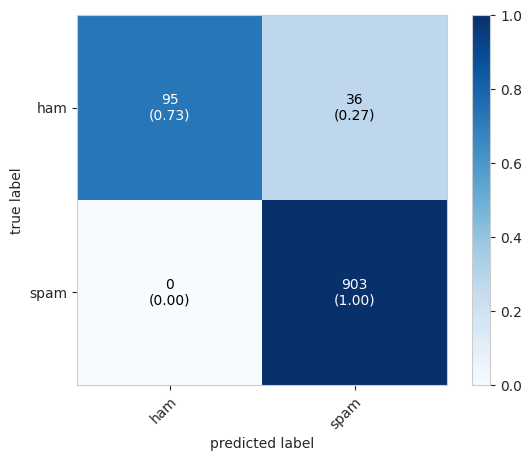

In [281]:
cm = confusion_matrix(ytest, y_pred_cv)
fig, ax = plot_confusion_matrix(conf_mat=cm , show_absolute=True, show_normed=True, colorbar=True, class_names=["ham", "spam"])

plt.show()

In [282]:
print('Train Accuracy - ', accuracy_score(ytrain,mnb_cv.predict(Xtrain_cv)))
print("Test Accuracy - ", accuracy_score(ytest,y_pred_cv))

Train Accuracy -  0.9932285368802902
Test Accuracy -  0.965183752417795


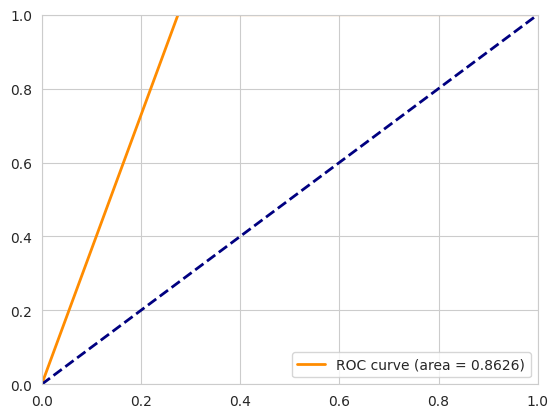

In [283]:
fpr, tpr, _ = roc_curve(ytest, y_pred_cv)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")